# GDP Machine Learning Model
### Ravi Shankar

GDP is an important indicator of economic activity in a nation. GDP is the sum of values (in USD) of products produced in a nation during a year, including net exports. The GDP/ capita (The GDP of a nation divided by its population) varies significantly among countries of the world, and has major impacts on the people.

We want to find a model to see what factors correlate with GDP/ capita. 

**Data comes via the World Bank, and the data across all listed countries was taken from 2018** because that was the most complete and recent year.

The data we will compare with GDP/ capita and these other indexes:

- Population
- Number secure internet servers/ million people
- Exports (as percentage of GDP)
- [Imports (as percentage of GDP)](https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS?view=chart)

We will create a [Regression Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) to tease out any trends or relationships between the features. This is an example of exploratory modelling. 

This model will also give us the ability to predict GDP. If there was a hypothetical new country where we knew their population, what percentage of their GDP is imports/exports, number of internet servers, etc., then we would have a data-based estimate of what their GDP would be.

# Import Data

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [84]:
GDPDF = pd.read_csv("GDP_attributes.csv")

#Drop countries with any NaNs in the data
length_before_drop = len(GDPDF)
GDPDF = GDPDF.dropna()
#reset indices
GDPDF =GDPDF.reset_index()
GDPDF = GDPDF.drop("index", axis =1)

print("Number rows dropped due to NaN's: ", length_before_drop-len(GDPDF))


#Rename column features
GDPDF.columns = ["Country Name", "GDP", "Internet", "Exports", "Imports", "Population" ]

#Add GDP per Capita Feature
GDPDF["GDPpC"] = GDPDF["GDP"]/GDPDF["Population"]

#Test 
#print(GDPDF[GDPDF["Country Name"] == "United States"])

GDPDF

Number rows dropped due to NaN's:  34


,Country Name,GDP,Internet,Exports,Imports,Population,GDPpC
0,Aruba,3.202189e+09,1152.617954,73.799397,74.626405,1.058460e+05,30253.279359
1,Africa Eastern and Southern,9.866110e+11,1164.559933,26.732987,29.070033,6.430901e+08,1534.172198
2,Africa Western and Central,7.381310e+11,89.707350,21.468395,23.620981,4.352294e+08,1695.958573
3,Angola,1.013530e+11,11.197741,40.836290,25.541821,3.080979e+07,3289.636504
4,Albania,1.514702e+10,526.099856,31.591574,45.264314,2.866376e+06,5284.380184
...,...,...,...,...,...,...,...
227,World,8.613930e+13,6171.416896,29.239847,28.514729,7.592476e+09,11345.350893
228,Samoa,8.214961e+08,535.364660,34.181263,50.224796,1.961280e+05,4188.571058
229,South Africa,3.682890e+11,12031.591630,29.907083,29.563251,5.779252e+07,6372.606697
230,Zambia,2.631164e+10,41.206304,37.957353,36.930894,1.735171e+07,1516.371100


In [103]:
#Export:
GDPDF.to_csv("GDPDF.csv")

# EDA

# GDP Explanatory ML Model

Here we will fit a Regression Tree classifier to the GDP data using the sklearn

A max depth of 3 was used because that made a human-understandable tree while using three different criteria to break down the countries into 8 groups.

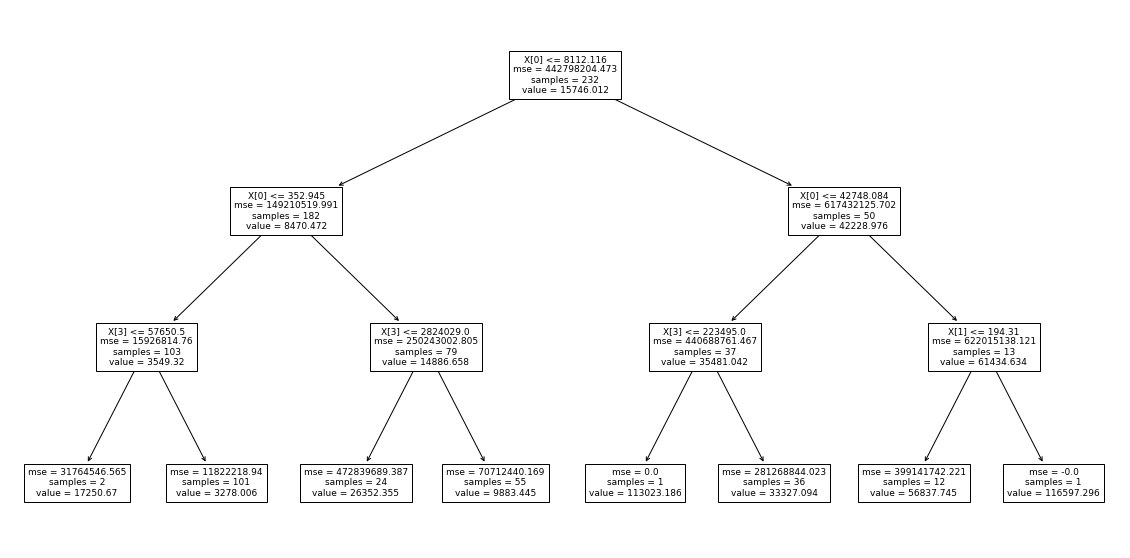

In [102]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
import matplotlib.pyplot as plt


#Decision tree with depth provided
#decision_tree = tree.DecisionTreeClassifier(max_depth = depth)



#Set up X and y
X = np.matrix(GDPDF.drop([ 'GDP','Country Name', 'GDPpC'], axis=1))

y = np.matrix( GDPDF.GDPpC )
y = y.reshape(-1, 1) 

#METHOD CALL:
regressor = DecisionTreeRegressor( random_state = 0,  max_depth = 3) 
# I would have liked to use absolute error instead of MSE, but couldn't get it to work
    
model = regressor.fit(X, y)
#print(tree.plot_tree(model))

plt.figure(figsize=(20,10))  # set plot size (denoted in inches)
tree.plot_tree(model, fontsize=9)
plt.show()


'''
X[0] = Number secure internet servers/ million people
X[1] = Exports (as percentage of GDP)
X[2] = Imports (as percentage of GDP)
X[3] = Population
'''

#Export a Prettier graph a la: https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='GDPtree.png',
               feature_names =["Internet", "Exports", "Imports", "Population" ]) 

```
{figure} ../GDPtree.png
:name: my-fig-ref

My figure title.
```

![Cat](images/no_regrets_cat.jpg)


# Results

It was found that internet servers per capita was the best feature for seperating GDP per capita.


After that, population is the feature with the strongest effect on determining GDP/capita.

Also some nodes had only one sample, indicating outliers with unique combinations of statistics. For instance:
- 13 countries had over 42,700 internet servers/ million population, but only 1 country out of those had exports over 194% of their GDP (**Luxembourg**)
- 37 countries had between 8,112 and 42,748 internet servers/ million population, but only 1 country out of those had a population less than 223,495 (**Bermuda**)